## Intro

In [1]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import os
import warnings

warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/University/mygproject

# %cd /gdrive/MyDrive/mygproject

Mounted at /gdrive
/gdrive/MyDrive/University/mygproject


In [ ]:
data = pd.read_csv('MetaData.csv')

NameError: ignored

In [ ]:
data.head()

In [ ]:
import ast
data.features = data.features.apply(lambda x: ast.literal_eval(x))

In [ ]:
header = ["chroma_stft",
"spectral_centroid",
"spectral_bandwidth",
"spectral_rolloff",
"spectral_contrast",
"tempogram",
"chroma_cqt",
"chroma_cens",
"melspectrogram",
"mfcc",
"poly_features",
"tonnetz", "rms", "zero_crossing_rate"]


data[header] = pd.DataFrame(data.features.tolist(), index= data.index)

In [ ]:
data = data.drop('features11', axis=1)
data = data.drop('features', axis=1)

In [ ]:
data.head()

,path,artist_name,song_name,chroma_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,spectral_contrast,tempogram,chroma_cqt,chroma_cens,melspectrogram,mfcc,poly_features,tonnetz,rms,zero_crossing_rate
0,folder5/Khaoula hsein - Hob Kbir (EXCLUSIVE L...,Khaoula hsein,folder5/Khaoula hsein,0.361957,2616.267400,2464.076703,5438.765340,21.907715,0.200885,0.534783,0.267098,12.522310,0.785101,3.155796,-0.012710,0.222943,0.144020
1,folder5/Ibrahem Al Amer – Yl3n Al Heniya (Excl...,Ibrahem Al Amer – Yl3n Al Heniya (Exclusive) ｜...,folder5/Ibrahem Al Amer – Yl3n Al Heniya (Excl...,0.336616,2726.175550,2373.699424,5365.338746,21.152739,0.180072,0.532505,0.272913,14.311244,-0.615392,3.774797,0.004088,0.262027,0.162579
2,folder5/Inkonnu - Inko ( Officiel Music Video ...,Inkonnu,folder5/Inkonnu,0.362957,2672.641086,2561.297932,5809.282608,21.022441,0.215259,0.497233,0.259025,2.397220,-3.679062,1.335599,-0.011053,0.098796,0.135130
3,folder5/Klay ft. Sanfara - E7tilel ｜ إحتلال [p...,Klay ft. Sanfara,folder5/Klay ft. Sanfara,0.419188,2878.648918,2571.133242,5829.780573,20.775564,0.216573,0.558313,0.269209,3.775680,-0.152380,1.603443,0.000445,0.116082,0.157018
4,folder5/Karaheny Feki - Tamer Ashour (EXCLUSIV...,Karaheny Feki,folder5/Karaheny Feki,0.416063,2292.916174,2355.859427,4887.756871,21.359763,0.210713,0.597510,0.272996,8.213881,0.990340,2.558079,-0.001154,0.172986,0.128274


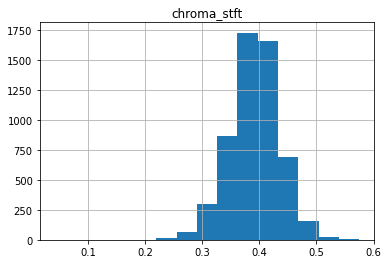

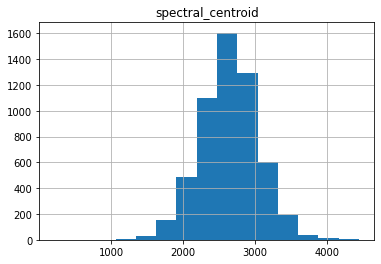

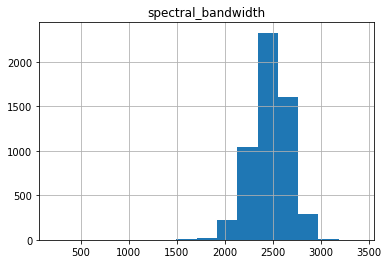

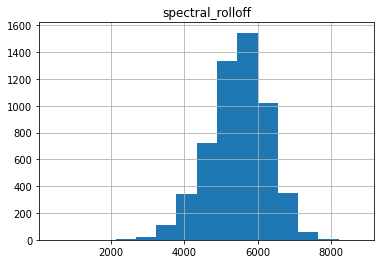

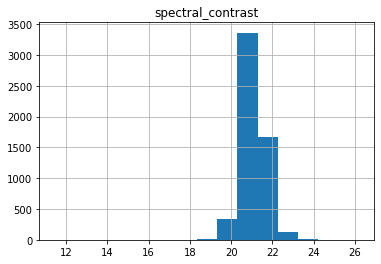

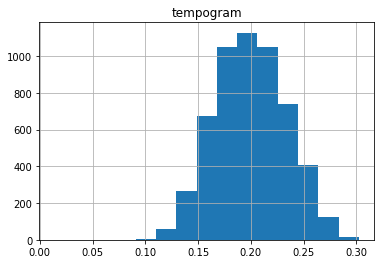

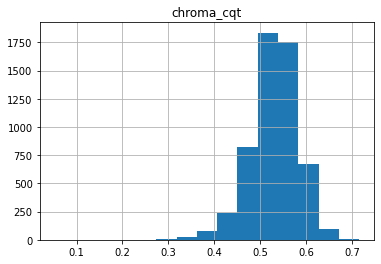

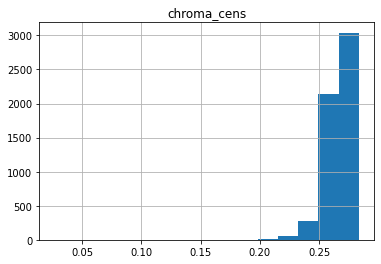

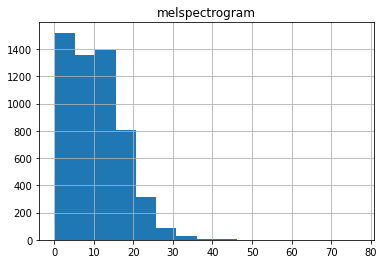

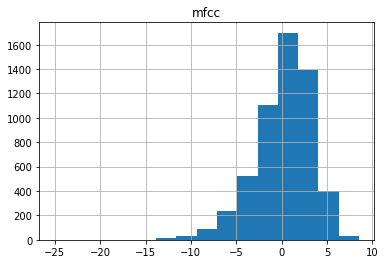

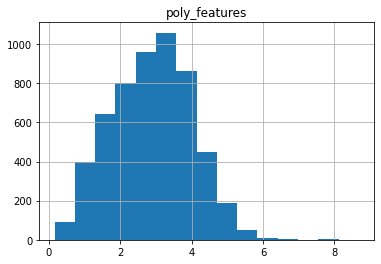

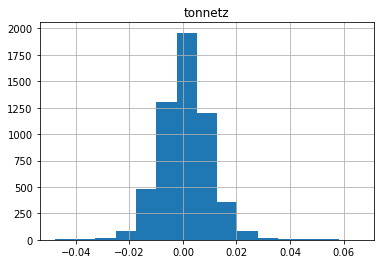

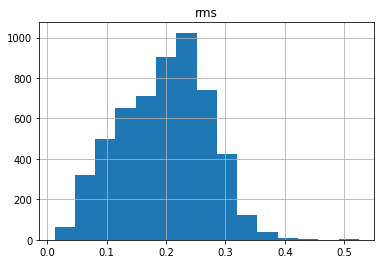

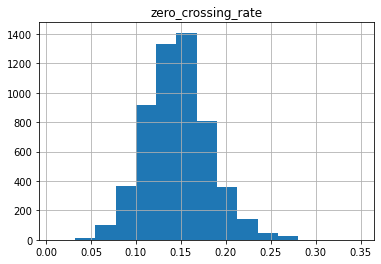

In [ ]:
for column in header:
  data[column].hist(bins=15)
  plt.title(column)
  plt.show()


## Scalling

In [ ]:
trainingDf = data[header]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


# df = pd.DataFrame(scale.fit_transform(df.values), columns=df.columns, index=df.index)

# ss = StandardScaler()

scaler.fit(trainingDf)
trainingDfScaled = pd.DataFrame(scaler.fit_transform(trainingDf), columns=header)

trainingDfScaled


,chroma_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,spectral_contrast,tempogram,chroma_cqt,chroma_cens,melspectrogram,mfcc,poly_features,tonnetz,rms,zero_crossing_rate
0,0.601149,0.567253,0.704818,0.599222,0.709194,0.648032,0.727643,0.935546,0.161840,0.768913,0.351149,0.309264,0.411359,0.397000
1,0.553670,0.593203,0.676351,0.590348,0.658004,0.575849,0.724205,0.958179,0.185064,0.727174,0.423799,0.456993,0.487602,0.451821
2,0.603023,0.580563,0.735441,0.644001,0.649170,0.697881,0.670970,0.904126,0.030395,0.635866,0.137519,0.323837,0.169175,0.370741
3,0.708381,0.629202,0.738539,0.646479,0.632431,0.702439,0.763156,0.943765,0.048290,0.740973,0.168955,0.424954,0.202896,0.435395
4,0.702525,0.490909,0.670732,0.532629,0.672041,0.682115,0.822314,0.958503,0.105907,0.775030,0.280997,0.410895,0.313903,0.350490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5513,0.551321,0.575064,0.677518,0.592814,0.642961,0.512316,0.681140,0.923903,0.143219,0.722300,0.345089,0.309185,0.403741,0.394760
5514,0.774479,0.722353,0.780831,0.733055,0.595923,0.652896,0.849788,0.970427,0.107918,0.823712,0.356395,0.414689,0.373136,0.611671
5515,0.576581,0.608436,0.693190,0.622899,0.677538,0.537957,0.670049,0.957175,0.233406,0.751786,0.496026,0.495317,0.564879,0.450211
5516,0.640841,0.659344,0.709529,0.650967,0.653690,0.554875,0.761744,0.953898,0.070610,0.685315,0.242235,0.467265,0.275733,0.522768


In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from sklearn.externals.joblib import dump, load

In [ ]:
dump(scaler, 'minmax_scaler.bin', compress=True)
# ss=load('std_scaler.bin')

['minmax_scaler.bin']

In [ ]:
trainingDfScaled.to_csv("scalledDataMinMax.csv", index=False)

## Machine Learning

#### Elbow Points Analysis

In [ ]:
labelsDf = data[["path", "artist_name"]]

In [ ]:
trainingDfScaled = trainingDfScaled[header]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

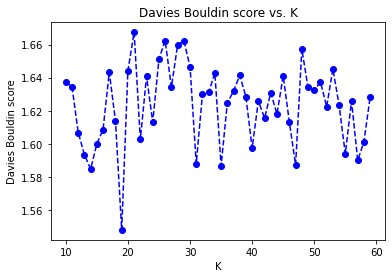

In [ ]:
# Davies Bouldin score for K means
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)
    # Then fit the model to your data using the fit method
    model = kmeans.fit_predict(data)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(data, model)
    
    return score
scores = []
centers = list(range(10,60))
for center in centers:
    scores.append(get_kmeans_score(trainingDfScaled, center))


plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');


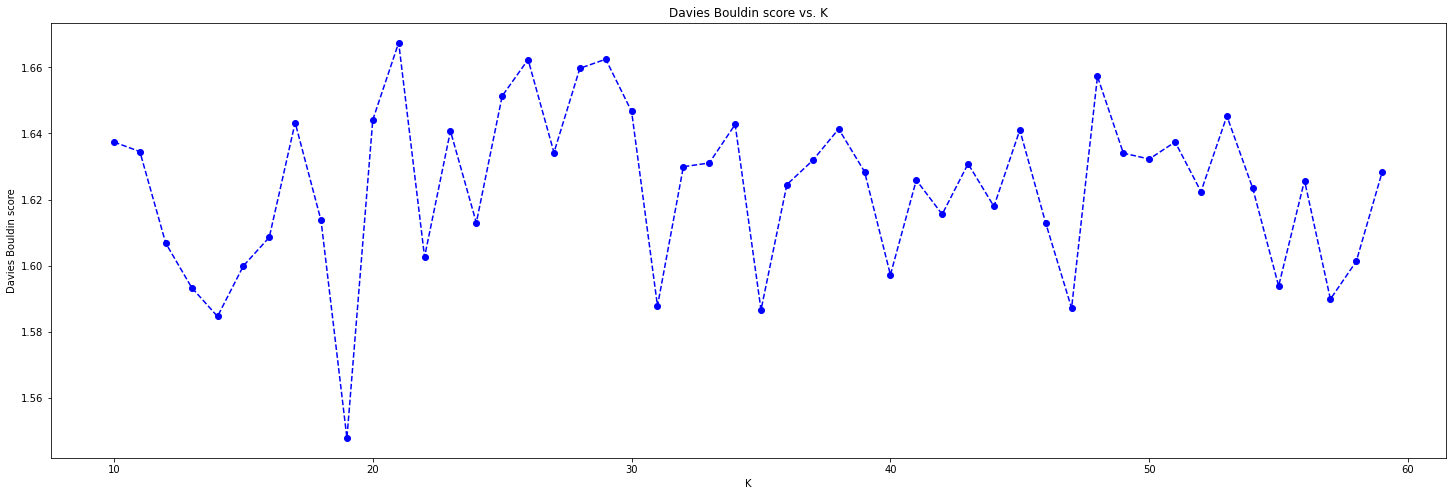

In [ ]:
fig, ax = plt.subplots(figsize=(25, 8))

ax.plot(centers, scores, linestyle='--', marker='o', color='b');
ax.set_xlabel('K');
ax.set_ylabel('Davies Bouldin score');
ax.set_title('Davies Bouldin score vs. K');


In [ ]:
# to find the ideal number of clusters when you have the full data: 
clusters = []
davies_bouldin_scores = []
for i in range(15, 25):
    km = KMeans(n_clusters=i).fit(trainingDfScaled)
    clusters.append(km.inertia_)
    

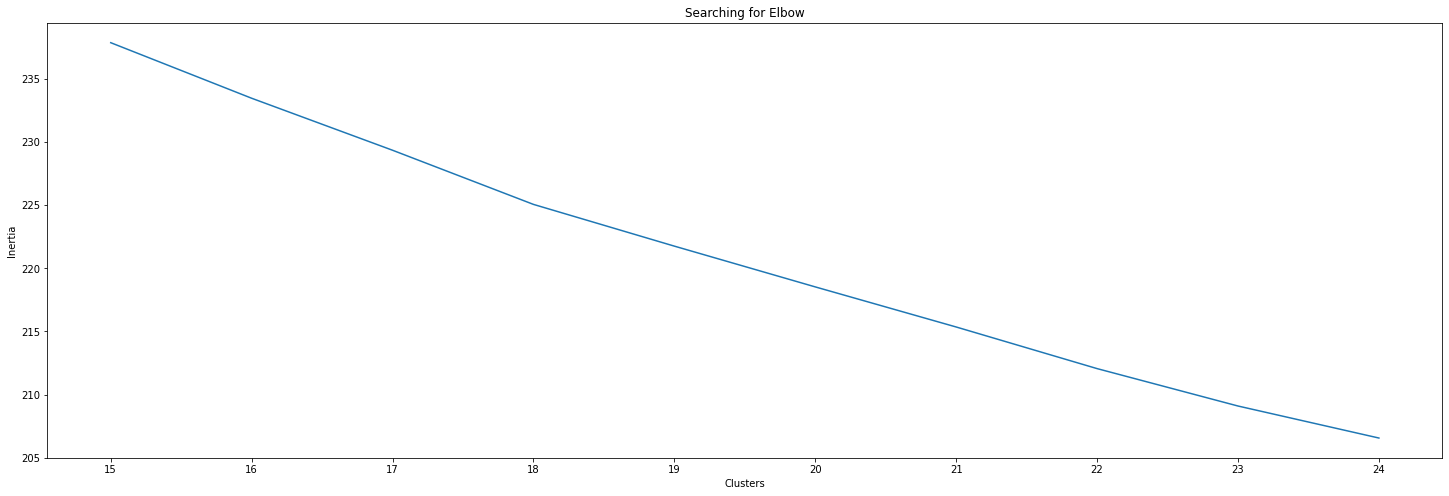

In [ ]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.lineplot(x=list(range(15, 25)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# ax.annotate('Possible Elbow Point', xy=(21, 29377), xytext=(22, 29377), xycoords='data',          
#              arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
# ax.annotate('Possible Elbow Point', xy=(29, 26542), xytext=(30, 26542), xycoords='data',          
#              arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.xticks(list(range(15, 25)))
plt.show()


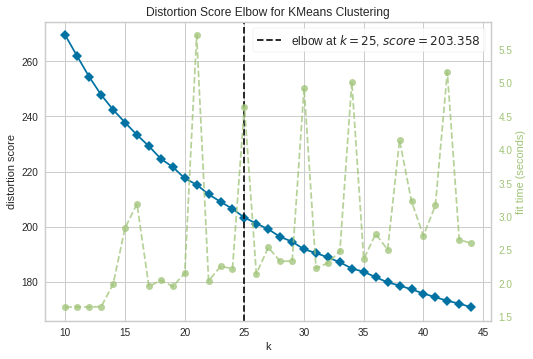

In [ ]:
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(10, 45), timings= True)
visualizer.fit(trainingDfScaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


#### k Means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
trainingDfScaled = trainingDfScaled[header]

In [ ]:
kmeans = KMeans(n_clusters = 25)

kmeans.fit(trainingDfScaled)
y_kmeans = kmeans.predict(trainingDfScaled)

centers = kmeans.cluster_centers_

labelsDf["kmeansClusters25"] = y_kmeans

print("inertia: " + str(kmeans.inertia_ ))
labelsDf.kmeansClusters25.value_counts()

inertia: 203.86500659022607


18    359
12    340
20    331
17    322
24    318
23    316
13    296
4     287
3     259
6     255
0     248
8     246
2     223
15    213
11    207
14    200
7     180
16    169
21    149
10    140
5     139
9     121
1     102
22     91
19      7
Name: kmeansClusters25, dtype: int64

In [ ]:
# labelsDf[labelsDf["clusters"]==8]

In [ ]:
labelsDf.artist_name.value_counts().keys()[0]

'Taylor Swift '

In [ ]:
labelsDf[labelsDf["artist_name"]=="Taylor Swift "].kmeansClusters25.value_counts()

6     8
16    8
13    8
24    5
14    4
23    4
7     3
9     3
15    2
12    2
20    2
0     2
21    2
17    1
11    1
2     1
4     1
5     1
8     1
3     1
Name: kmeansClusters25, dtype: int64

In [ ]:
labelsDf[(labelsDf["artist_name"]=="Taylor Swift ") & (labelsDf["kmeansClusters25"]==16)]

,path,artist_name,kmeansClusters25
5294,folder12/Taylor Swift - 22 [AgFeZr5ptV8].mp3,Taylor Swift,16
5304,folder12/Taylor Swift - I'm Only Me When I'm W...,Taylor Swift,16
5317,folder12/Taylor Swift - Change [B1jYllE0T-k].mp3,Taylor Swift,16
5318,folder12/Taylor Swift - Red [Zlot0i3Zykw].mp3,Taylor Swift,16
5343,folder12/Taylor Swift - Picture To Burn [yCMqc...,Taylor Swift,16
5372,folder12/Taylor Swift - Mean [jYa1eI1hpDE].mp3,Taylor Swift,16
5379,folder12/Taylor Swift - You Belong With Me [Vu...,Taylor Swift,16
5382,folder12/Taylor Swift - Fearless [ptSjNWnzpjg]...,Taylor Swift,16


In [ ]:
# fig, ax = plt.subplots(figsize=(12, 8))

# ax = sns.heatmap(trainingDfScaled.corr(), annot=True)

In [ ]:
import pickle

pickle.dump(kmeans, open('c_kmenas25.sav', 'wb'))


In [ ]:
loaded_model = joblib.load('c_kmenas25.sav')
# loaded_model.cluster_centers_

#### Hierarchical Clustering

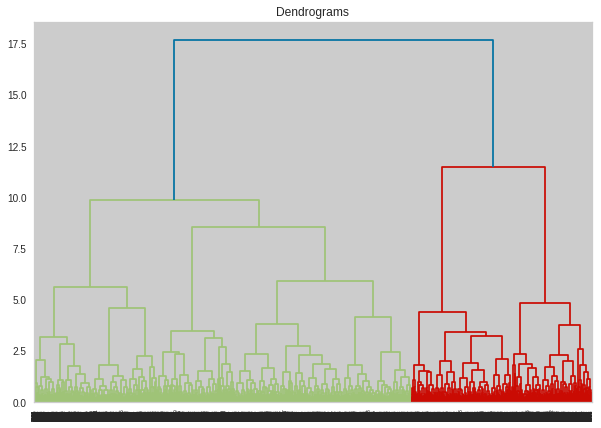

In [ ]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(trainingDfScaled, method='ward'))


In [ ]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=25, linkage='average').fit(trainingDfScaled)

labelsDf['AgglomerativeClusteringLabels'] = agglom.labels_

labelsDf.AgglomerativeClusteringLabels.value_counts()

2     3604
13    1389
1      201
11     136
5       60
4       49
22      27
19       8
9        7
10       6
6        6
20       3
3        3
21       3
14       2
0        2
8        2
7        2
24       2
16       1
17       1
23       1
18       1
15       1
12       1
Name: AgglomerativeClusteringLabels, dtype: int64

In [ ]:
trainingDfScaled = trainingDfScaled[header]
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=25, linkage='ward').fit(trainingDfScaled)

labelsDf['AgglomerativeClusteringLabels2'] = agglom.labels_

labelsDf.AgglomerativeClusteringLabels2.value_counts()

3     485
0     447
8     364
2     363
15    340
10    321
1     288
5     284
9     265
17    230
4     229
14    219
7     216
6     200
12    193
22    164
11    163
16    149
13    139
19    138
23    137
18     89
24     71
20     23
21      1
Name: AgglomerativeClusteringLabels2, dtype: int64

In [ ]:
pickle.dump(agglom, open('AgglomerativeClusteringWard27.sav', 'wb'))

In [ ]:
# trainingDf = trainingDf[header]
# from sklearn.cluster import AgglomerativeClustering 

# agglom = AgglomerativeClustering(n_clusters=10, linkage='complete').fit(trainingDfScaled)

# trainingDfScaled['AgglomerativeClusteringLabels3'] = agglom.labels_

In [ ]:
# trainingDf = trainingDf[header]
# from sklearn.cluster import AgglomerativeClustering 

# agglom = AgglomerativeClustering(n_clusters=10, linkage='single').fit(trainingDfScaled)

# trainingDfScaled['AgglomerativeClusteringLabels4'] = agglom.labels_

## Ranking - cosine Similarity 

In [ ]:
rankingDf = trainingDfScaled[header]
rankingDf["path"] = labelsDf["path"] 
rankingDf["artist_name"] = labelsDf["artist_name"] 
rankingDf["kmeansClusters25"] = labelsDf["kmeansClusters25"] 
# rankingDf["AgglomerativeClusteringLabels2"] = labelsDf["AgglomerativeClusteringLabels2"] 


In [ ]:
rankingDf[rankingDf["artist_name"]=="Taylor Swift "].iloc[0]

chroma_stft                                                    0.473571
spectral_centroid                                              0.430912
spectral_bandwidth                                             0.548493
spectral_rolloff                                               0.414948
spectral_contrast                                              0.692249
tempogram                                                      0.777111
chroma_cqt                                                     0.612679
chroma_cens                                                    0.872722
melspectrogram                                                 0.113057
mfcc                                                           0.676344
poly_features                                                  0.284777
tonnetz                                                        0.575248
rms                                                            0.331701
zero_crossing_rate                                             0

In [ ]:
from scipy import spatial

cosine_sim = rankingDf[rankingDf["kmeansClusters25"]==17][header].apply(lambda x: spatial.distance.cosine(x, rankingDf[rankingDf["artist_name"]=="Taylor Swift "].iloc[0][header]), axis=1)



In [ ]:
indices = pd.DataFrame(cosine_sim, columns=["sim"]).reset_index().sort_values(by=['sim'], ascending=False)[:20]["index"].to_list()

In [ ]:
rankingDf.iloc[indices]["path"]

4293    folder2/Celine Dion   Because You Loved Me [O3...
3861    folder15/Tracy Chapman - Fast car [DwrHwZyFN7M...
82      folder5/Freddie Gibbs - Too Much (ft. Moneybag...
4469    folder4/Flyleaf - Believe In Dreams (lyrics) [...
141      folder3/Dobie gray- drift away [gr_eVcCAUXo].mp3
4474    folder4/FELIZ NAVIDAD - WHY DONT WE (LYRICS VI...
1977    folder9/My Father's Father ⧸⧸ The Civil Wars [...
4030    folder3/Dalia Saeed - Mestaghnyen An Khadamatk...
3902    folder15/The Doxology ｜ Anthem Lights ft. Sela...
1204    folder7/Nassif Zeytoun - Badi Yaha [Lyric Vide...
48      folder5/Fayrouz Arkan - Benak W Biny (Official...
2071    folder12/روجيه خوري سمعني يا قلبا Roger khouri...
4686     folder10/اصيل هميم - ظالم ولكن [yS1CpZZr-Sg].mp3
1060    folder6/Mariam Khalifa - Hafakar Fe Nafsy ( Mu...
2532    folder1/Ben Rector - When a Heart Breaks [oHCr...
2386    folder11/Rilo Kiley - With Arms Outstretched l...
3919    folder15/Train - ＂Feels Good At First＂ [IqcElE...
2683    folder

In [ ]:
def estimate(features, clusterId, clusterType, songName, rankingDf, artist_name):
  header = ["chroma_stft",
  "spectral_centroid",
  "spectral_bandwidth",
  "spectral_rolloff",
  "spectral_contrast",
  "tempogram",
  "chroma_cqt",
  "chroma_cens",
  "melspectrogram",
  "mfcc",
  "poly_features",
  "tonnetz", "rms", "zero_crossing_rate"]
  rankingDf = rankingDf[rankingDf[clusterType]==clusterId]
  rankingDf["scores"] = rankingDf[header].apply(lambda x: spatial.distance.cosine(x, features), axis=1)
  rankingDf = rankingDf.sort_values(by=['scores'], ascending=True)
  return rankingDf
  # indices = pd.DataFrame(cosine_sim, columns=["sim"]).reset_index().sort_values(by=['sim'], ascending=False)
  # newDf = rankingDf.iloc[indices[:20]["index"].to_list()]
  # newDf["scores"] = indices[:20]["sim"]
  return newDf

In [ ]:
test = rankingDf[rankingDf["artist_name"]=="Taylor Swift "].iloc[1]
temp = estimate(test[header], test["kmeansClusters25"], "kmeansClusters25", test["path"], rankingDf, "Taylor Swift ")
temp [:20].path

5248      folder12/Taylor Swift - Style [-CmadmM5cOk].mp3
5134    folder7/LMFAO - Sexy and I Know It [wyx6JDQCsl...
2860    folder8/LMFAO - Sexy and I Know It [wyx6JDQCsl...
4805    folder17/Owl City - When Can I See You Again？ ...
3686    folder24/Beyoncé - If I Were A Boy [AWpsOqh8q0...
4802    folder17/OneRepublic - Feel Again (Official Mu...
3370    folder18/Matchbox Twenty - Push (Official Vide...
4836    folder17/O.A.R. - ＂Shattered＂ [Official] Music...
3168    folder20/Goo Goo Dolls - Iris [Official Music ...
2828    folder13/Toad The Wet Sprocket - Walk On The O...
5105    folder5/Jordin Sparks, Chris Brown - No Air (O...
5250    folder12/T.I. - Live Your Life ft. Rihanna [Of...
2697    folder13/Thomas Rhett - Get Me Some Of That [g...
5201    folder7/Logan Mize-Ain't Always Pretty [N77T9K...
3010    folder8/Logan Mize-Ain't Always Pretty [N77T9K...
4470    folder4/Florida Georgia Line - Dirt [42uphHWxm...
3233       folder20/Grimes - California [OsCfufAp2tM].mp3
3709    folder

In [ ]:
rankingDf["song_name"] = rankingDf["path"].apply(lambda path: path.split("/")[1])

In [ ]:
import re
rankingDf['artist_name'] = rankingDf['artist_name'].apply(lambda name: re.split(r'[`\-=~!@#$%^&*()_+\[\]{};\'\\:"|<,./<>?]|–', name)[0] ).str.strip()


In [ ]:
rankingDf

,chroma_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,spectral_contrast,tempogram,chroma_cqt,chroma_cens,melspectrogram,mfcc,poly_features,tonnetz,rms,zero_crossing_rate,path,artist_name,kmeansClusters25,song_name
0,0.601149,0.567253,0.704818,0.599222,0.709194,0.648032,0.727643,0.935546,0.161840,0.768913,0.351149,0.309264,0.411359,0.397000,folder5/Khaoula hsein - Hob Kbir (EXCLUSIVE L...,Khaoula hsein,18,Khaoula hsein - Hob Kbir (EXCLUSIVE Lyric Cli...
1,0.553670,0.593203,0.676351,0.590348,0.658004,0.575849,0.724205,0.958179,0.185064,0.727174,0.423799,0.456993,0.487602,0.451821,folder5/Ibrahem Al Amer – Yl3n Al Heniya (Excl...,Ibrahem Al Amer,18,Ibrahem Al Amer – Yl3n Al Heniya (Exclusive) ｜...
2,0.603023,0.580563,0.735441,0.644001,0.649170,0.697881,0.670970,0.904126,0.030395,0.635866,0.137519,0.323837,0.169175,0.370741,folder5/Inkonnu - Inko ( Officiel Music Video ...,Inkonnu,14,Inkonnu - Inko ( Officiel Music Video ) [pV4fU...
3,0.708381,0.629202,0.738539,0.646479,0.632431,0.702439,0.763156,0.943765,0.048290,0.740973,0.168955,0.424954,0.202896,0.435395,folder5/Klay ft. Sanfara - E7tilel ｜ إحتلال [p...,Klay ft,13,Klay ft. Sanfara - E7tilel ｜ إحتلال [p6zbi_gwE...
4,0.702525,0.490909,0.670732,0.532629,0.672041,0.682115,0.822314,0.958503,0.105907,0.775030,0.280997,0.410895,0.313903,0.350490,folder5/Karaheny Feki - Tamer Ashour (EXCLUSIV...,Karaheny Feki,12,Karaheny Feki - Tamer Ashour (EXCLUSIVE ) ｜ 20...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5513,0.551321,0.575064,0.677518,0.592814,0.642961,0.512316,0.681140,0.923903,0.143219,0.722300,0.345089,0.309185,0.403741,0.394760,folder15/ياسر عبد الوهاب - يا اول حب ( حصريا )...,ياسر عبد الوهاب,8,ياسر عبد الوهاب - يا اول حب ( حصريا ) - ( 2018...
5514,0.774479,0.722353,0.780831,0.733055,0.595923,0.652896,0.849788,0.970427,0.107918,0.823712,0.356395,0.414689,0.373136,0.611671,folder15/هشام الحاج ｜ مايقدر الله ｜ (Hisham El...,هشام الحاج ｜ مايقدر الله ｜,11,هشام الحاج ｜ مايقدر الله ｜ (Hisham El Hajj ｜ M...
5515,0.576581,0.608436,0.693190,0.622899,0.677538,0.537957,0.670049,0.957175,0.233406,0.751786,0.496026,0.495317,0.564879,0.450211,folder15/ياسر عبد الوهاب - ندامه ( اوديو حصري...,ياسر عبد الوهاب,20,ياسر عبد الوهاب - ندامه ( اوديو حصريا ) - 201...
5516,0.640841,0.659344,0.709529,0.650967,0.653690,0.554875,0.761744,0.953898,0.070610,0.685315,0.242235,0.467265,0.275733,0.522768,folder15/#ثغرات لاول مرة الكروب الجديد (فيديو ...,,0,#ثغرات لاول مرة الكروب الجديد (فيديو كليب حصري...


In [ ]:
rankingDf.to_csv("clusteredData.csv", index=False)

## Pipeline

In [ ]:
trainingDfScaled =  pd.read_csv('scalledData.csv')

In [ ]:
trainingDfScaled.iloc[1755]

chroma_stft           0.594486
spectral_centroid    -0.730056
spectral_bandwidth   -1.056765
spectral_rolloff     -0.766658
spectral_contrast    -1.957275
tempogram             1.564042
chroma_cqt            0.274685
chroma_cens          -0.460595
melspectrogram       -1.199204
mfcc                 -0.949834
poly_features        -1.278944
tonnetz              -0.617759
rms                  -1.410455
zero_crossing_rate   -0.468982
Name: 1755, dtype: float64

In [ ]:
data.iloc[1755]

path                  folder6/Imagine Dragons - Radioactive [ktvTqkn...
artist_name                                            Imagine Dragons 
song_name                                      folder6/Imagine Dragons 
features              [0.4170236, 2356.3139162755706, 2262.178257913...
features11                                                          NaN
chroma_stft                                                    0.417024
spectral_centroid                                           2356.313916
spectral_bandwidth                                          2262.178258
spectral_rolloff                                            4867.119551
spectral_contrast                                             19.901229
tempogram                                                      0.251883
chroma_cqt                                                     0.544713
chroma_cens                                                    0.260534
melspectrogram                                                 2

In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from sklearn.externals.joblib import dump, load
ss=load('std_scaler.bin')

In [ ]:
ss.transform(pd.DataFrame(data.iloc[0][header]).T)

array([[-0.6717774 , -0.08003375, -0.03309355, -0.04728196,  1.42014249,
         0.03641746,  0.08191247,  0.14091473,  0.28980568,  0.1710327 ,
         0.23907728, -1.46928627,  0.35772249, -0.06509872]])

In [ ]:
ss.mean_

array([3.91170675e-01, 2.64827405e+03, 2.47060373e+03, 5.47633752e+03,
       2.10640237e+01, 1.99669361e-01, 5.30563387e-01, 2.65560015e-01,
       1.05056098e+01, 2.50408913e-01, 2.89027269e+00, 9.74504147e-04,
       1.96651389e-01, 1.46338812e-01])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 

kmeansPipe = Pipeline([
        ('scale', StandardScaler()),
        ('kmeans', KMeans(n_clusters = 27, init='k-means++', max_iter=1000 )),
        # ('agglom' , AgglomerativeClustering(n_clusters=27, linkage='ward'))
        ])
agglomPipe = Pipeline([
        ('scale', StandardScaler()),
        # ('kmeans', KMeans(n_clusters = 27, init='k-means++', max_iter=1000 )),
        ('agglom' , AgglomerativeClustering(n_clusters=27, linkage='ward'))
        ])





kmeansPipe.fit(data[header])
agglomPipe.fit(data[header])
# print(grid.best_score_)
# print(grid.cv_results_)


Pipeline(steps=[('scale', StandardScaler()),
                ('agglom', AgglomerativeClustering(n_clusters=27))])

In [ ]:
pipe.transform(data[header])

array([[2.53300813, 1.76911989, 4.3785298 , ..., 3.77802411, 2.32263644,
        4.10479367],
       [2.308582  , 1.53245122, 4.26171827, ..., 4.04077701, 3.09220567,
        4.34666422],
       [3.49794514, 4.4476868 , 5.12165169, ..., 2.17582523, 3.75287839,
        2.48762212],
       ...,
       [3.30672081, 1.92557732, 4.87154114, ..., 4.91199816, 3.5036409 ,
        5.20583067],
       [2.537804  , 3.530001  , 5.42907757, ..., 3.27822892, 4.04494018,
        2.1539778 ],
       [3.17353447, 3.88938131, 6.0204614 , ..., 4.34594472, 4.72013052,
        3.46061102]])

In [ ]:
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('kmeans', KMeans(max_iter=1000, n_clusters=27)),
                ('agglom', AgglomerativeClustering(n_clusters=27))])

,chroma_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,spectral_contrast,tempogram,chroma_cqt,chroma_cens,melspectrogram,mfcc,poly_features,tonnetz,rms,zero_crossing_rate
0,0.361957,2616.267400,2464.076703,5438.765340,21.907715,0.200885,0.534783,0.267098,12.522310,0.785101,3.155796,-0.012710,0.222943,0.144020
1,0.336616,2726.175550,2373.699424,5365.338746,21.152739,0.180072,0.532505,0.272913,14.311244,-0.615392,3.774797,0.004088,0.262027,0.162579
2,0.362957,2672.641086,2561.297932,5809.282608,21.022441,0.215259,0.497233,0.259025,2.397220,-3.679062,1.335599,-0.011053,0.098796,0.135130
3,0.419188,2878.648918,2571.133242,5829.780573,20.775564,0.216573,0.558313,0.269209,3.775680,-0.152380,1.603443,0.000445,0.116082,0.157018
4,0.416063,2292.916174,2355.859427,4887.756871,21.359763,0.210713,0.597510,0.272996,8.213881,0.990340,2.558079,-0.001154,0.172986,0.128274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5513,0.335362,2649.348793,2377.402301,5385.741755,20.930875,0.161752,0.503971,0.264106,11.087964,-0.778932,3.104164,-0.012719,0.219038,0.143262
5514,0.454466,3273.186197,2705.401519,6546.134304,20.237129,0.202288,0.615713,0.276059,8.368736,2.623761,3.200495,-0.000722,0.203349,0.216695
5515,0.348844,2790.694584,2427.159374,5634.674933,21.440834,0.169146,0.496622,0.272655,18.034960,0.210429,4.390196,0.008446,0.301640,0.162034
5516,0.383141,3006.316895,2479.033114,5866.917526,21.089110,0.174024,0.557377,0.271813,5.494959,-2.019871,2.227815,0.005256,0.153420,0.186598


In [ ]:
trainingDfScaled["path"]=data.path
trainingDfScaled["artist_name"]=data.artist_name
trainingDfScaled["song_name"]=data.song_name


In [ ]:
trainingDfScaled

,chroma_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,spectral_contrast,tempogram,chroma_cqt,chroma_cens,melspectrogram,mfcc,poly_features,tonnetz,rms,zero_crossing_rate,path,artist_name,song_name
0,-0.671777,-0.080034,-0.033094,-0.047282,1.420142,0.036417,0.081912,0.140915,0.289806,0.171033,0.239077,-1.469286,0.357722,-0.065099,folder5/Khaoula hsein - Hob Kbir (EXCLUSIVE L...,Khaoula hsein,folder5/Khaoula hsein
1,-1.254476,0.194795,-0.491327,-0.139684,0.149331,-0.587048,0.037686,0.673791,0.546881,-0.276945,0.796426,0.334294,0.889481,0.455915,folder5/Ibrahem Al Amer – Yl3n Al Heniya (Excl...,Ibrahem Al Amer – Yl3n Al Heniya (Exclusive) ｜...,folder5/Ibrahem Al Amer – Yl3n Al Heniya (Excl...
2,-0.648775,0.060931,0.459841,0.418988,-0.069994,0.466985,-0.647029,-0.598865,-1.165199,-1.256926,-1.399829,-1.291371,-1.331394,-0.314663,folder5/Inkonnu - Inko ( Officiel Music Video ...,Inkonnu,folder5/Inkonnu
3,0.644262,0.576060,0.509708,0.444783,-0.485550,0.506349,0.538686,0.334429,-0.967111,-0.128841,-1.158663,-0.056863,-1.096205,0.299804,folder5/Klay ft. Sanfara - E7tilel ｜ إحتلال [p...,Klay ft. Sanfara,folder5/Klay ft. Sanfara
4,0.572389,-0.888585,-0.581780,-0.740688,0.497803,0.330803,1.299584,0.681403,-0.329328,0.236683,-0.299107,-0.228500,-0.321984,-0.507124,folder5/Karaheny Feki - Tamer Ashour (EXCLUSIV...,Karaheny Feki,folder5/Karaheny Feki
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5513,-1.283309,0.002687,-0.472553,-0.114008,-0.224123,-1.135804,-0.516223,-0.133217,0.083686,-0.329257,0.192588,-1.470251,0.304594,-0.086388,folder15/ياسر عبد الوهاب - يا اول حب ( حصريا )...,ياسر عبد الوهاب,folder15/ياسر عبد الوهاب
5514,1.455469,1.562614,1.190479,1.346264,-1.391871,0.078428,1.652959,0.962158,-0.307075,0.759168,0.279324,-0.182179,0.091132,1.975115,folder15/هشام الحاج ｜ مايقدر الله ｜ (Hisham El...,هشام الحاج ｜ مايقدر الله ｜ (Hisham El Hajj ｜ M...,folder15/هشام الحاج ｜ مايقدر الله ｜ (Hisham El...
5515,-0.973293,0.356127,-0.220273,0.199257,0.634266,-0.914330,-0.658879,0.650144,1.081989,-0.012788,1.350533,0.802189,1.428451,0.440611,folder15/ياسر عبد الوهاب - ندامه ( اوديو حصري...,ياسر عبد الوهاب,folder15/ياسر عبد الوهاب
5516,-0.184641,0.895299,0.042739,0.491518,0.042227,-0.768206,0.520515,0.572988,-0.720045,-0.726198,-0.596477,0.459700,-0.588202,1.130188,folder15/#ثغرات لاول مرة الكروب الجديد (فيديو ...,#ثغرات لاول مرة الكروب الجديد (فيديو كليب حصري...,folder15/#ثغرات لاول مرة الكروب الجديد (فيديو ...


In [4]:
data = pd.read_csv('clusteredData.csv')

In [5]:
from collections import defaultdict
artist_graph_name = defaultdict()
j = 1
for i in data["artist_name"]:
  artist_graph_name[j] = i
  j+=1





In [6]:
data

,chroma_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,spectral_contrast,tempogram,chroma_cqt,chroma_cens,melspectrogram,mfcc,poly_features,tonnetz,rms,zero_crossing_rate,path,artist_name,kmeansClusters25,song_name
0,0.601149,0.567253,0.704818,0.599222,0.709194,0.648032,0.727643,0.935546,0.161840,0.768913,0.351149,0.309264,0.411359,0.397000,folder5/Khaoula hsein - Hob Kbir (EXCLUSIVE L...,Khaoula hsein,18,Khaoula hsein - Hob Kbir (EXCLUSIVE Lyric Cli...
1,0.553670,0.593203,0.676351,0.590348,0.658004,0.575849,0.724205,0.958179,0.185064,0.727174,0.423799,0.456993,0.487602,0.451821,folder5/Ibrahem Al Amer – Yl3n Al Heniya (Excl...,Ibrahem Al Amer,18,Ibrahem Al Amer – Yl3n Al Heniya (Exclusive) ｜...
2,0.603023,0.580563,0.735441,0.644001,0.649170,0.697881,0.670970,0.904126,0.030395,0.635866,0.137519,0.323837,0.169175,0.370741,folder5/Inkonnu - Inko ( Officiel Music Video ...,Inkonnu,14,Inkonnu - Inko ( Officiel Music Video ) [pV4fU...
3,0.708381,0.629202,0.738539,0.646479,0.632431,0.702439,0.763156,0.943765,0.048290,0.740973,0.168955,0.424954,0.202896,0.435395,folder5/Klay ft. Sanfara - E7tilel ｜ إحتلال [p...,Klay ft,13,Klay ft. Sanfara - E7tilel ｜ إحتلال [p6zbi_gwE...
4,0.702525,0.490909,0.670732,0.532629,0.672041,0.682115,0.822314,0.958503,0.105907,0.775030,0.280997,0.410895,0.313903,0.350490,folder5/Karaheny Feki - Tamer Ashour (EXCLUSIV...,Karaheny Feki,12,Karaheny Feki - Tamer Ashour (EXCLUSIVE ) ｜ 20...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5513,0.551321,0.575064,0.677518,0.592814,0.642961,0.512316,0.681140,0.923903,0.143219,0.722300,0.345089,0.309185,0.403741,0.394760,folder15/ياسر عبد الوهاب - يا اول حب ( حصريا )...,ياسر عبد الوهاب,8,ياسر عبد الوهاب - يا اول حب ( حصريا ) - ( 2018...
5514,0.774479,0.722353,0.780831,0.733055,0.595923,0.652896,0.849788,0.970427,0.107918,0.823712,0.356395,0.414689,0.373136,0.611671,folder15/هشام الحاج ｜ مايقدر الله ｜ (Hisham El...,هشام الحاج ｜ مايقدر الله ｜,11,هشام الحاج ｜ مايقدر الله ｜ (Hisham El Hajj ｜ M...
5515,0.576581,0.608436,0.693190,0.622899,0.677538,0.537957,0.670049,0.957175,0.233406,0.751786,0.496026,0.495317,0.564879,0.450211,folder15/ياسر عبد الوهاب - ندامه ( اوديو حصري...,ياسر عبد الوهاب,20,ياسر عبد الوهاب - ندامه ( اوديو حصريا ) - 201...
5516,0.640841,0.659344,0.709529,0.650967,0.653690,0.554875,0.761744,0.953898,0.070610,0.685315,0.242235,0.467265,0.275733,0.522768,folder15/#ثغرات لاول مرة الكروب الجديد (فيديو ...,NaN,0,#ثغرات لاول مرة الكروب الجديد (فيديو كليب حصري...


In [7]:
data["artist_name"]

0                    Khaoula hsein
1                  Ibrahem Al Amer
2                          Inkonnu
3                          Klay ft
4                    Karaheny Feki
                   ...            
5513               ياسر عبد الوهاب
5514    هشام الحاج ｜ مايقدر الله ｜
5515               ياسر عبد الوهاب
5516                           NaN
5517                 نوال الكويتيه
Name: artist_name, Length: 5518, dtype: object

In [9]:
data["artist_name"].to_csv("Artists.csv", index=False)